# <center>Boombikes Bike Sharing Prediction
#### <center> ***Domain: Mobility***

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('datasets/day.csv')

df.drop(['dteday','instant'], axis=1, inplace=True)
display(df.head())

target = 'cnt'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



Inference: The Datset consists of 14 features & 730 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 7 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

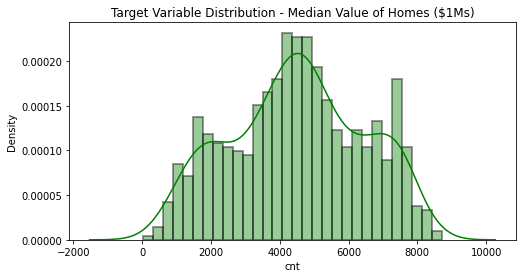

In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around 20 units.

                               Visualising Categorical Features:                                


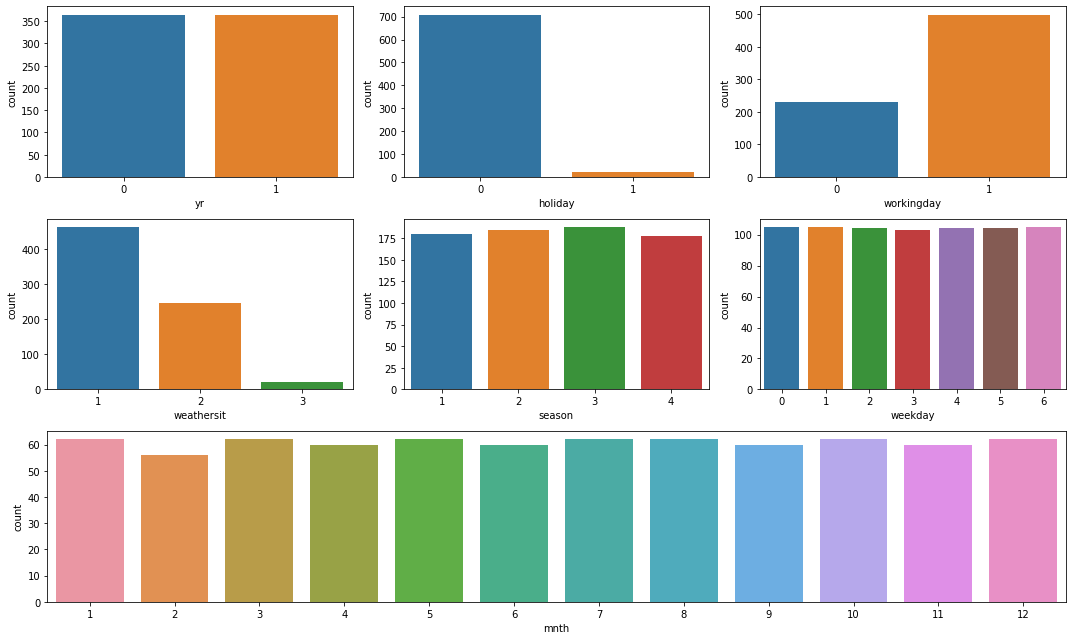

In [8]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,3)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

**Inference:** There are no categorical features in the dataset.

                                                Numeric Features Distribution                                                 


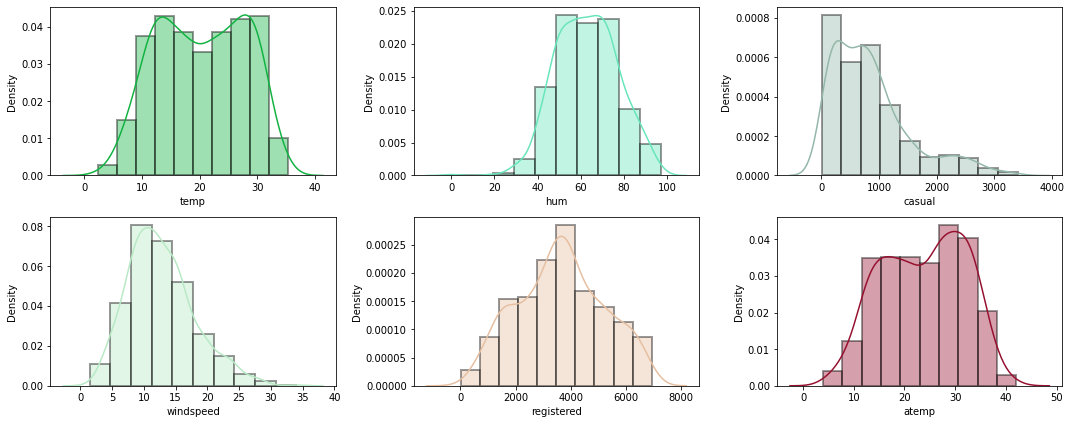

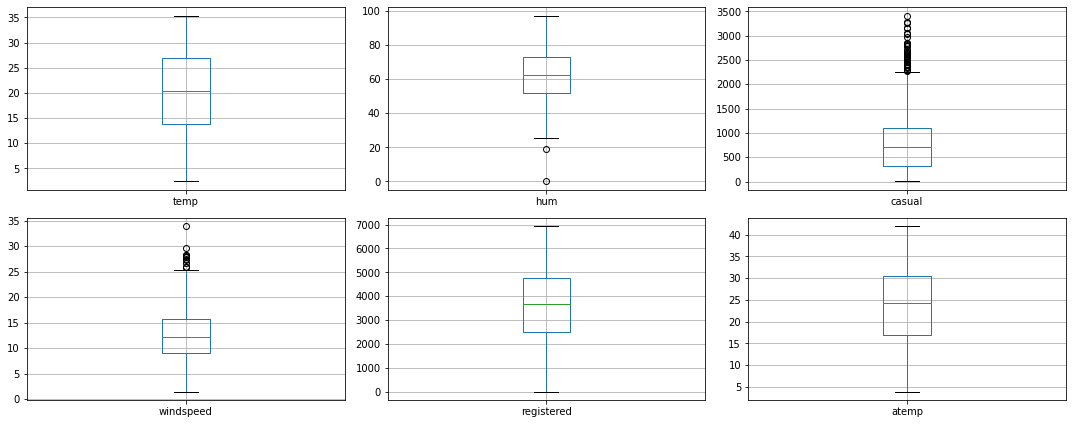

In [9]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

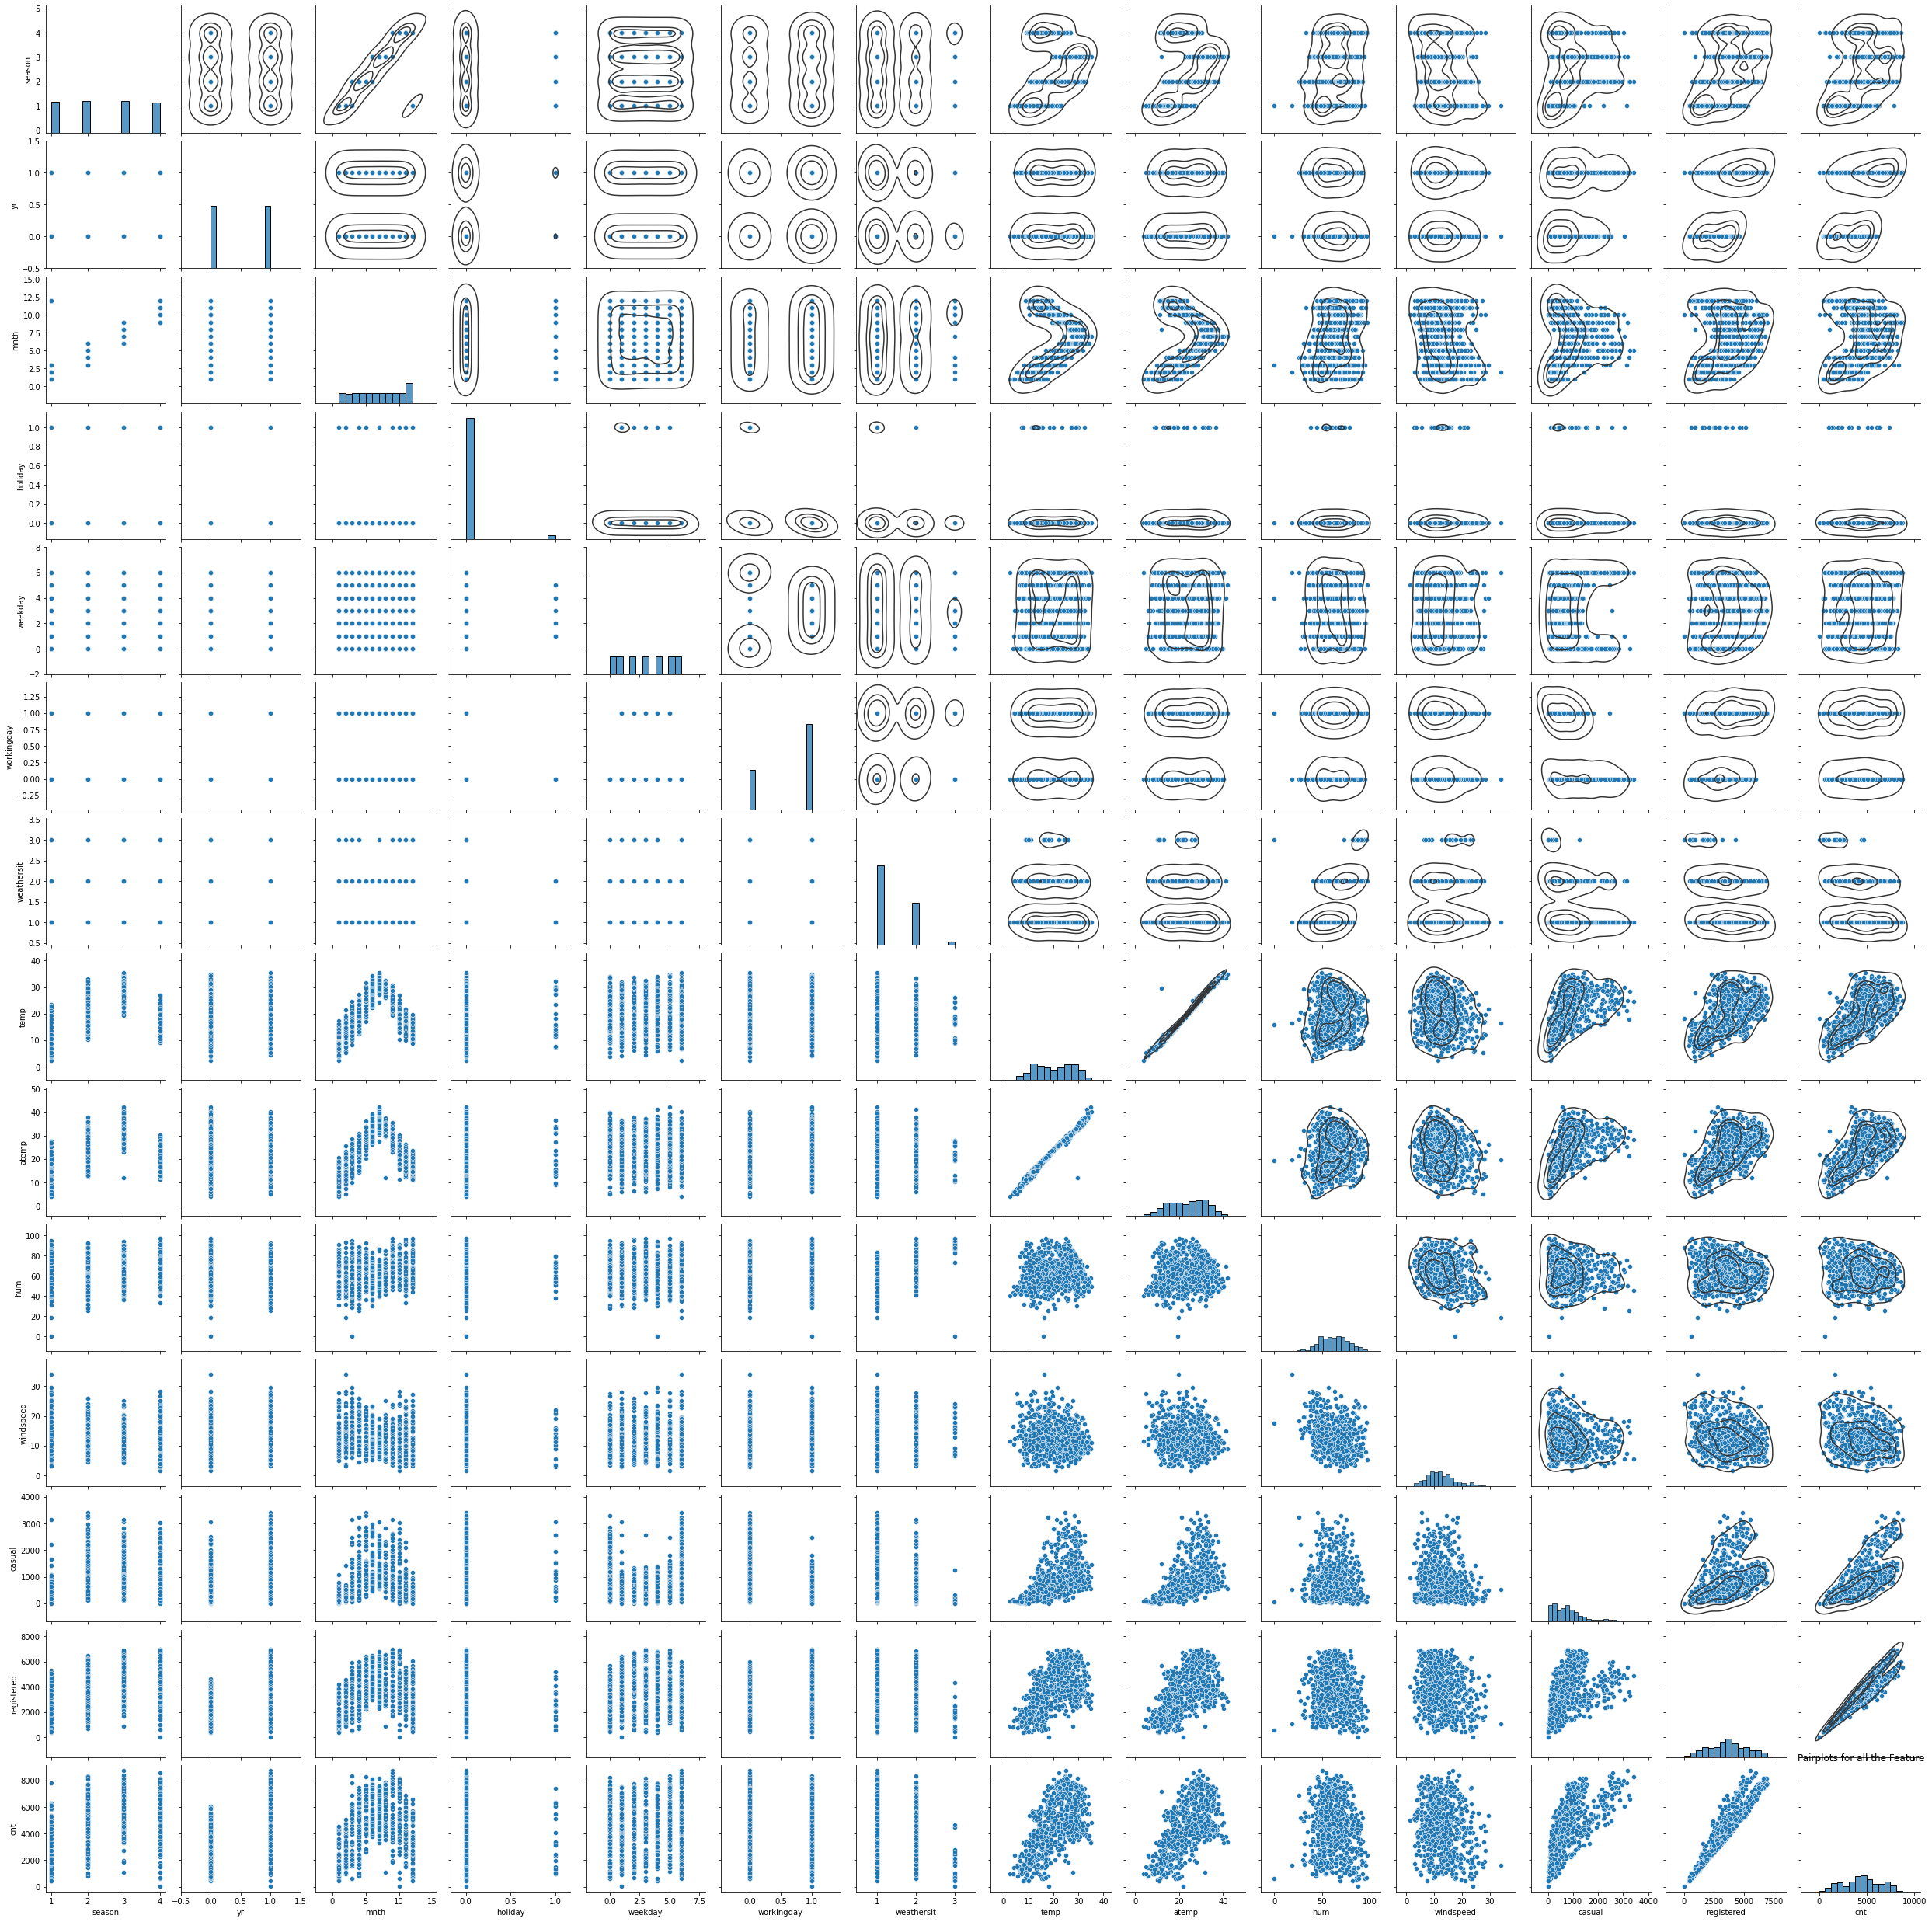

In [10]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [11]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [12]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

            Total Null Values  Percentage
season                      0         0.0
yr                          0         0.0
mnth                        0         0.0
holiday                     0         0.0
weekday                     0         0.0
workingday                  0         0.0
weathersit                  0         0.0
temp                        0         0.0
atemp                       0         0.0
hum                         0         0.0
windspeed                   0         0.0
casual                      0         0.0
registered                  0         0.0
cnt                         0         0.0


**Inference:** The datset doesn't have any inconsistant values.

In [13]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
yr
holiday
workingday

Dummy Encoding on features:
weathersit
season
weekday
mnth


(730, 32)

In [14]:
#Removal of outlier:

df1 = df3.copy()
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 730 samples.
After removal of outliers, The dataset now has 672 samples.


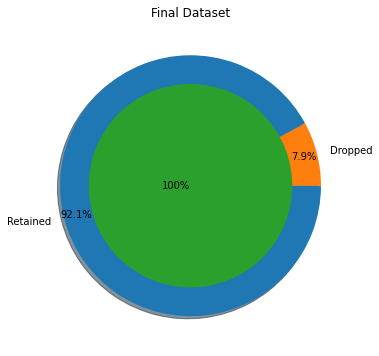


Inference: After the cleanup process, 58 samples were dropped, while retaining 7.95% of the data.


In [15]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [16]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (672, 31) (672,) 
Training set  --->  (537, 31) (537,) 
Testing set   --->  (135, 31)  (135,)


In [17]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,weathersit_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,...,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,2.894436e-18,1.488567e-17,1.166044e-16,1.199124e-17,-1.554726e-16,3.754497e-16,-2.853087e-17,-4.558737e-17,1.753201e-16,2.026105e-16,...,-2.682522e-16,-1.457555e-16,2.108804e-16,1.620884e-16,6.698552e-17,6.119665e-17,5.354707e-17,1.993026e-16,7.670256e-17,8.435214e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,...,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-9.263539e-01,-1.636113e-01,-1.644217e+00,-2.286119e+00,-2.323698e+00,-2.487149e+00,-2.286649e+00,-1.411974e+00,-2.269189e+00,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
25%,-9.263539e-01,-1.636113e-01,-1.644217e+00,-8.576950e-01,-8.497981e-01,-7.718838e-01,-7.298249e-01,-8.581299e-01,-7.297237e-01,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
50%,-9.263539e-01,-1.636113e-01,6.081924e-01,-9.448390e-02,-2.696842e-02,-3.761584e-02,-9.691080e-02,-8.739574e-02,-8.059751e-03,-6.952880e-01,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
75%,1.079501e+00,-1.636113e-01,6.081924e-01,9.008183e-01,8.527429e-01,7.172211e-01,6.128465e-01,5.768299e-01,6.781851e-01,1.438253e+00,...,-3.133042e-01,-2.798451e-01,-2.912876e-01,-2.680602e-01,-3.168751e-01,-3.204207e-01,-2.836951e-01,-2.912876e-01,-3.239418e-01,-3.168751e-01
max,1.079501e+00,6.112049e+00,6.081924e-01,2.012161e+00,2.251741e+00,2.423668e+00,2.588831e+00,2.956811e+00,2.111393e+00,1.438253e+00,...,3.191786e+00,3.573406e+00,3.433033e+00,3.730505e+00,3.155817e+00,3.120897e+00,3.524911e+00,3.433033e+00,3.086975e+00,3.155817e+00



                                          Standardardization on Testing set                                          


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,weathersit_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.128577,0.022334,-0.025819,0.097623,0.099003,0.137586,-0.135094,0.084897,0.074969,0.189736,...,-0.131559,0.119751,0.039763,0.235463,-0.136810,-0.065508,0.054848,0.094938,-0.121813,-0.008191
std,1.005309,1.068085,1.016730,0.953623,0.939262,0.939658,0.977444,1.057592,0.988668,1.055089,...,0.780071,1.179138,1.063827,1.331528,0.772860,0.904608,1.087903,1.139684,0.808348,0.991951
min,-0.926354,-0.163611,-1.644217,-2.085856,-2.204964,-2.237494,-1.867442,-1.342259,-1.919426,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
25%,-0.926354,-0.163611,-1.644217,-0.721565,-0.684823,-0.554541,-0.812458,-0.762272,-0.643073,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
50%,1.079501,-0.163611,0.608192,0.191166,0.253632,0.135677,-0.293537,-0.131936,0.100727,-0.695288,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
75%,1.079501,-0.163611,0.608192,0.896352,0.856560,0.778896,0.467516,0.596195,0.756929,1.438253,...,-0.313304,-0.279845,-0.291288,-0.268060,-0.316875,-0.320421,-0.283695,-0.291288,-0.323942,-0.316875
max,1.079501,6.112049,0.608192,1.864874,1.925724,2.408985,2.605845,2.935509,2.089256,1.438253,...,3.191786,3.573406,3.433033,3.730505,3.155817,3.120897,3.524911,3.433033,3.086975,3.155817


---

# <center> 5. Feature Selection/Extraction

                                       Correlation Matrix                                       


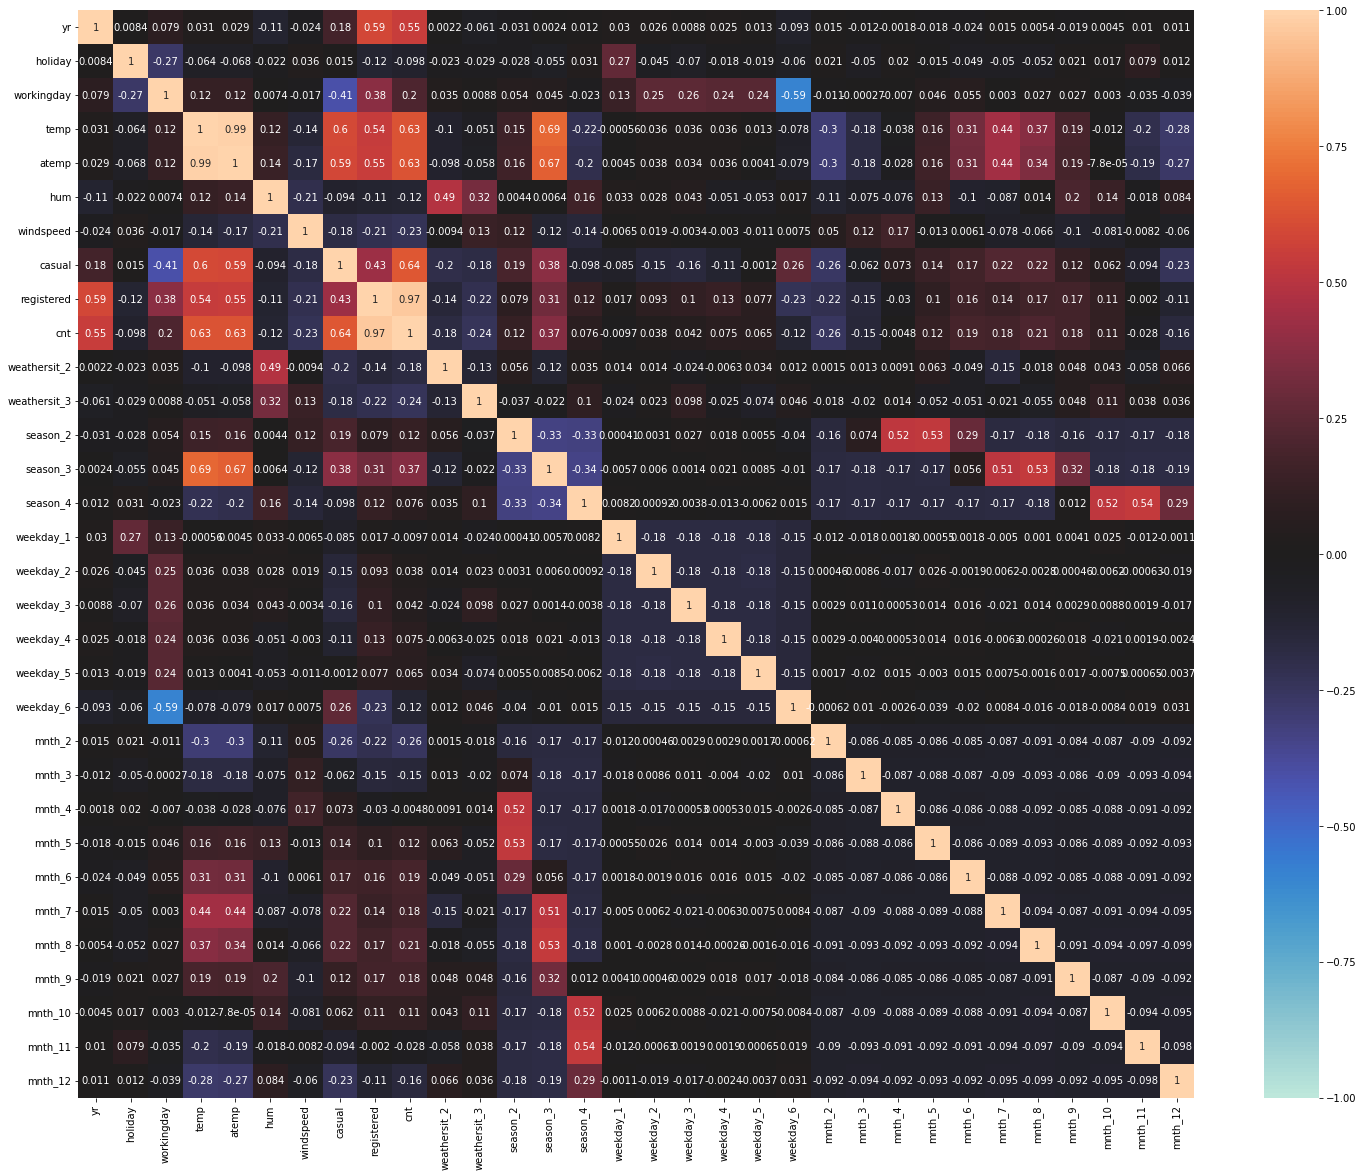

In [18]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [19]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.242e+30
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:11:51   Log-Likelihood:                 13475.
No. Observations:                 537   AIC:                        -2.689e+04
Df Residuals:                     506   BIC:                        -2.676e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4338.8734   1.36e-13   3.19e+16      0.000    4338.873    4338.873
yr           -8.355e-13   2.48e-13     -3.365      0.001   -1.32e-12   -3.48e-13
holiday       3.382e-13   1.47e-13      2.295      0.022    4.87e-14    6.28e-13
workingday   -4.587e-13   2.12e-13     -2.165      0.031   -8.75e-13   -4.24e-14
temp         -1.936e-12   1.18e-12     -1.646      0.100   -4.25e-12    3.74e-13
atemp         1.103e-12   1.07e-12      1.032      0.303   -9.97e-13     3.2e-12
hum           9.631e-13   2.14e-13      4.506      0.000    5.43e-13    1.38e-12
windspeed      1.39e-13   1.64e-13      0.848      0.397   -1.83e-13    4.61e-13
casual         516.3908   2.91e-13   1.78e+15      0.000     516.391     516.391
registered    1581.0683   3.89e-13   4.07e+15      0.000    1581.068    1581.068
weathersit_2  5.404e-14   1.85e-13      0.292      0.770   -3.09e-13    4.17e-13
weathersit_3  4.062e-13    1.8e-13      2.255      0.025    5.23e-14     7.6e-13
season_2      9.518e-13   3.54e-13      2.688      0.007    2.56e-13    1.65e-12
season_3      2.073e-12   4.66e-13      4.447      0.000    1.16e-12    2.99e-12
season_4     -5.375e-13   4.18e-13     -1.287      0.199   -1.36e-12    2.83e-13
weekday_1    -5.065e-13   1.26e-13     -4.029      0.000   -7.53e-13   -2.59e-13
weekday_2    -7.099e-13   1.31e-13     -5.415      0.000   -9.68e-13   -4.52e-13
weekday_3    -6.701e-13   1.33e-13     -5.024      0.000   -9.32e-13   -4.08e-13
weekday_4    -7.374e-13   1.33e-13     -5.563      0.000   -9.98e-13   -4.77e-13
weekday_5    -1.413e-12   1.22e-13    -11.547      0.000   -1.65e-12   -1.17e-12
weekday_6    -4.773e-13   1.79e-13     -2.669      0.008   -8.29e-13   -1.26e-13
mnth_2        2.619e-13   1.81e-13      1.451      0.148   -9.28e-14    6.17e-13
mnth_3        2.408e-13   2.25e-13      1.070      0.285   -2.01e-13    6.83e-13
mnth_4        1.763e-13   3.08e-13      0.572      0.567   -4.29e-13    7.82e-13
mnth_5        -3.56e-14   3.45e-13     -0.103      0.918   -7.13e-13    6.42e-13
mnth_6       -6.174e-13   3.45e-13     -1.788      0.074    -1.3e-12    6.08e-14
mnth_7        3.677e-13   4.46e-13      0.825      0.410   -5.08e-13    1.24e-12
mnth_8        1.504e-13   4.32e-13      0.348      0.728   -6.99e-13    9.99e-13
mnth_9       -7.204e-13   3.45e-13     -2.090      0.037    -1.4e-12   -4.33e-14
mnth_10       2.899e-13   3.16e-13      0.917      0.359   -3.31e-13    9.11e-13
mnth_11       2.446e-13   3.23e-13      0.757      0.450    -3.9e-13     8.8e-13
mnth_12      -1.486e-13   2.55e-13     -0.583      0.560   -6.49e-13    3.52e-13
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.380
Skew:      

 ---

**Approach:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['weekday_2', 'temp', 'season_3', 'registered', 'atemp', 'season_4', 'season_2', 'workingday', 'casual', 'hum', 'mnth_7', 'weekday_1', 'mnth_12', 'mnth_3', 'weekday_3', 'mnth_10', 'mnth_4', 'weekday_6', 'mnth_8', 'weathersit_3', 'mnth_5', 'weekday_4', 'mnth_9', 'mnth_6', 'holiday', 'weathersit_2', 'mnth_2']


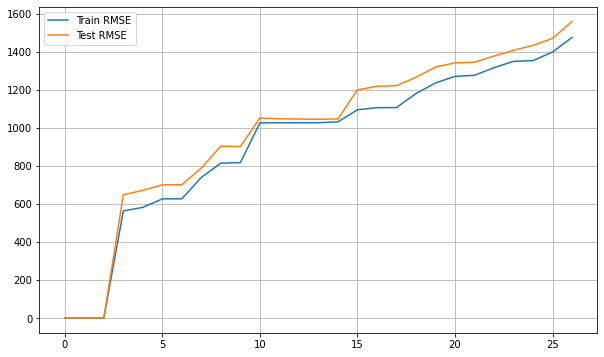

In [20]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

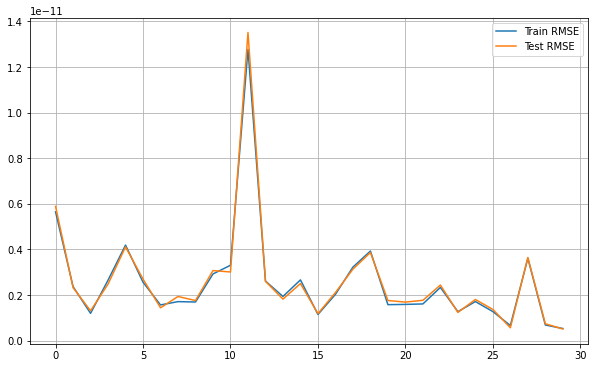

In [21]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

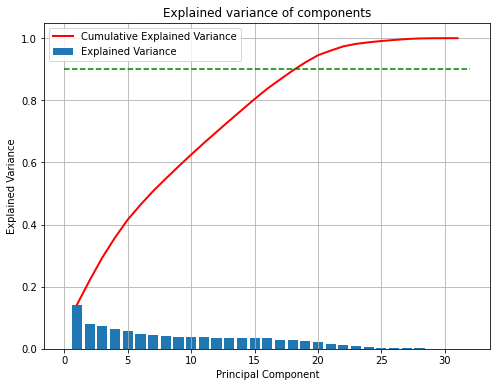

In [22]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

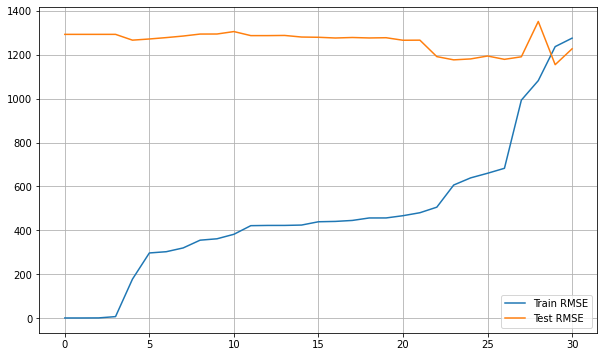

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

#### Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most  features using manual RFE Technique. But let us skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [24]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-df.shape[1]+3)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

5.334641683721648e-13
5.13295571048135e-13


---

# <center> 6. Predictive Modelling

In [25]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

## Objective: 
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


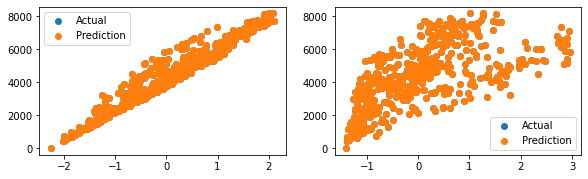



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 5.3346417e-13

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 5.1329557e-13

--------------------Residual Plots--------------------


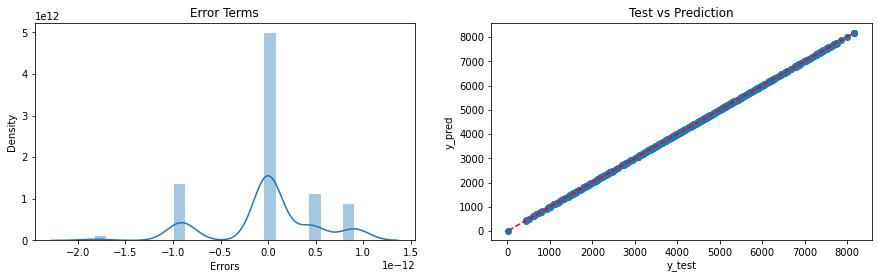

In [26]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


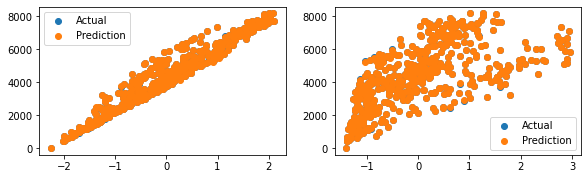



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999974781597214
Residual Sum of Squares (RSS) on Training set  ---> 4695.906197263395
Mean Squared Error (MSE) on Training set       ---> 8.744704277957906
Root Mean Squared Error (RMSE) on Training set ---> 2.9571446156652375

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.999997508603511
Residual Sum of Squares (RSS) on Training set  ---> 1150.05770124008
Mean Squared Error (MSE) on Training set       ---> 8.518945935111704
Root Mean Squared Error (RMSE) on Training set ---> 2.918723339940205

--------------------Residual Plots--------------------


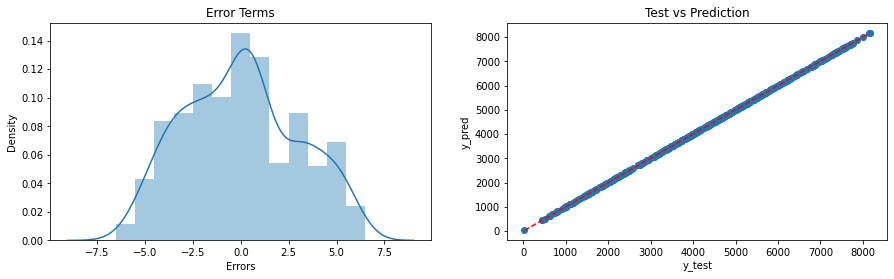

In [27]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


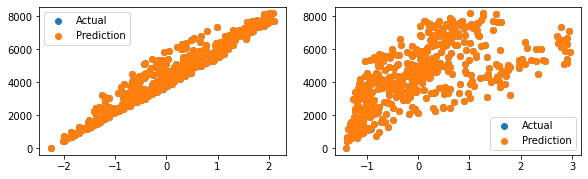



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999996050993837
Residual Sum of Squares (RSS) on Training set  ---> 735.342466863062
Mean Squared Error (MSE) on Training set       ---> 1.3693528246984394
Root Mean Squared Error (RMSE) on Training set ---> 1.1701934988276252

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9999995863151233
Residual Sum of Squares (RSS) on Training set  ---> 190.96176802873077
Mean Squared Error (MSE) on Training set       ---> 1.4145316150276355
Root Mean Squared Error (RMSE) on Training set ---> 1.1893408321535235

--------------------Residual Plots--------------------


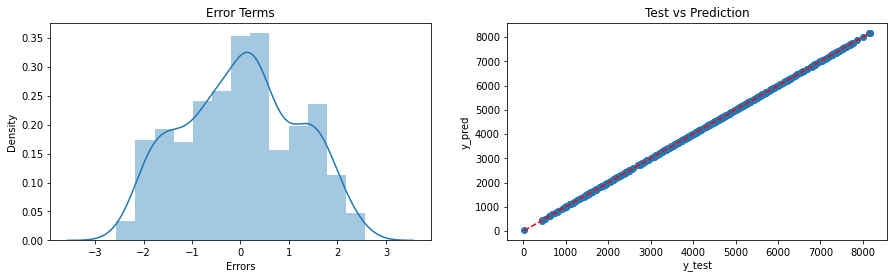

In [28]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


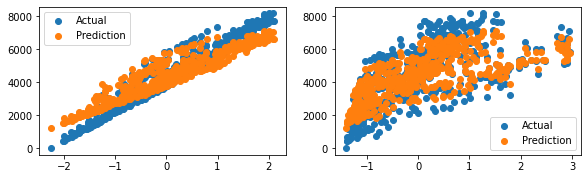



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9186470175174858
Residual Sum of Squares (RSS) on Training set  ---> 151486982.67961696
Mean Squared Error (MSE) on Training set       ---> 282098.6642078528
Root Mean Squared Error (RMSE) on Training set ---> 531.1296114959632

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9193640445679679
Residual Sum of Squares (RSS) on Training set  ---> 37222498.285557985
Mean Squared Error (MSE) on Training set       ---> 275722.20952265174
Root Mean Squared Error (RMSE) on Training set ---> 525.0925723362041

--------------------Residual Plots--------------------


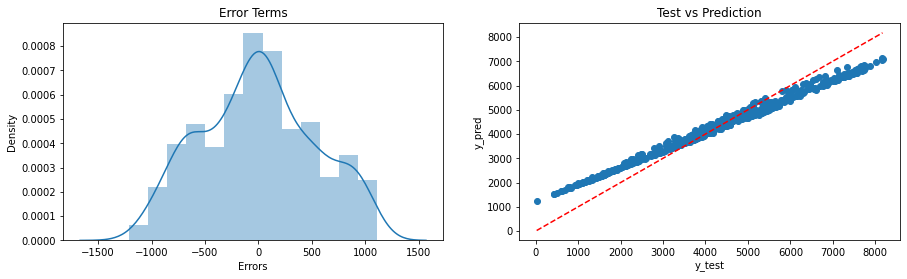

In [29]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

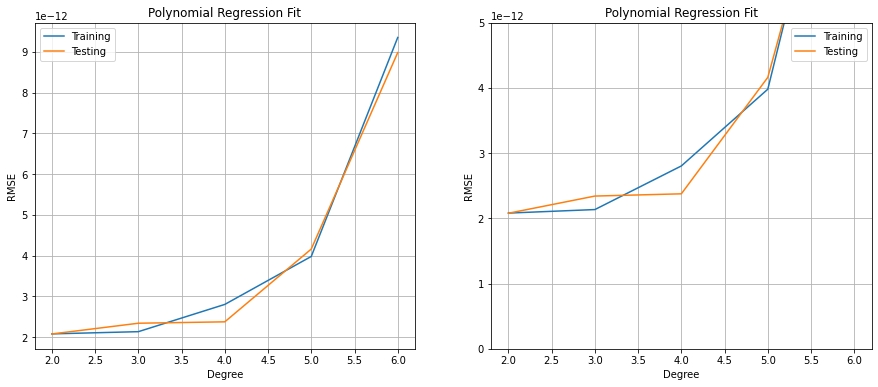

In [30]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,5e-12])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.show()

**Inference:** We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 516.39075268 1581.06834478]
The Intercept of the Regresion Model was found to be  4338.873370577281


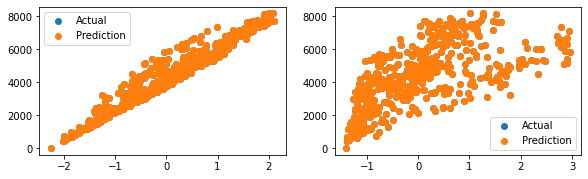



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 2.08040012e-12

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 2.0780253e-12

--------------------Residual Plots--------------------


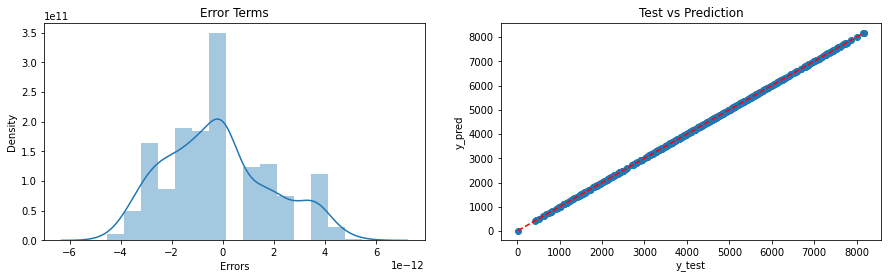

In [31]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [32]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,5.334642e-13,5.132956e-13
Ridge Linear Regression (RLR),0.999997,0.999998,4.695906e+03,1.150058e+03,8.744704,8.518946,2.957145e+00,2.918723e+00
Lasso Linear Regression (LLR),1.000000,1.000000,7.353425e+02,1.909618e+02,1.369353,1.414532,1.170193e+00,1.189341e+00
Elastic-Net Regression (ENR),0.918647,0.919364,1.514870e+08,3.722250e+07,282098.664208,275722.209523,5.311296e+02,5.250926e+02
Polynomial Regression (PNR),1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.080400e-12,2.078025e-12


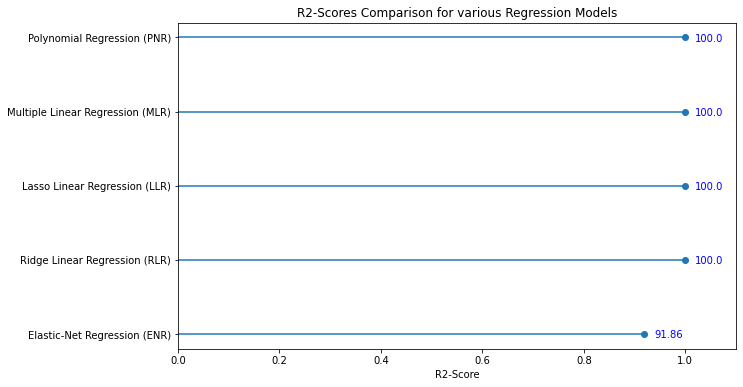

In [33]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

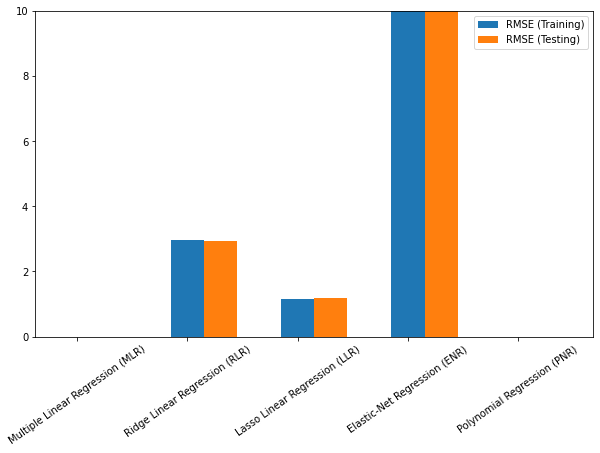

In [34]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,10])
plt.show()

**Inference:**\
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple MLR Model gave the best results. 

In [35]:
#<<<--------------------------------------------THE END------------------------------------------------>>>